<a href="https://colab.research.google.com/github/HanYang-AI/HYAI/blob/main/4_K_Nearest_Neighbor_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/NBA Hall of Famers 2021.csv")

In [80]:
x1 = df.loc[df.position == "C"]
x2 = df.loc[df.position == "G"]

In [81]:
new_df = pd.concat([x1, x2], axis=0)

In [82]:
x=new_df.loc[:, ["height", "weight"]]
y=new_df.loc[:, "position"]

x = np.array(x)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.33, random_state=42)

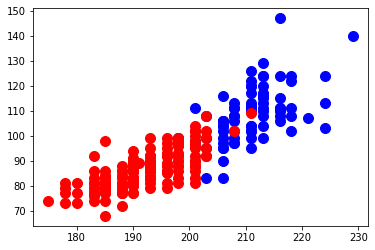

In [83]:
import matplotlib.pyplot as plt

for val, inp in enumerate(x):
  if y[val] == 'G':
    plt.scatter(inp[0], inp[1], s=100, c='r')
  else:
    plt.scatter(inp[0], inp[1], s=100, c='b')

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.33, random_state=42)

In [71]:
import math

def get_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i])**2
    return math.sqrt(distance)

In [72]:
import numpy as np

def knn(new, x, y, k):
    neighbor_distance = []
    for i in x:
        neighbor_distance.append(get_distance(new, i))
    
    sorted = np.sort(neighbor_distance)
    sorted_idx = np.argsort(neighbor_distance)

    y_sorted = [y[i] for i in sorted_idx]

    return max(y_sorted[:k], key=y_sorted[:k].count)

In [73]:
def gridsearch(k_parameters):
    total = 0
    best = 0
    idx = 0
    for i in k_parameters:
        for j in range(len(x_validation)):
            total += y_validation[j] == knn(x_validation[j], x_train, y_train, i)
        if total/len(x_validation) > best:
            best = total/len(x_validation)
            idx = i
        total = 0

    print(f"k가 {idx}일 때 {best} 의 정확도로 제일 높습니다.")

In [74]:
params = [i for i in range(1, 200)]
gridsearch(params)

k가 3일 때 0.9647058823529412 의 정확도로 제일 높습니다.


In [78]:
knn([150, 30], x, y, 3)

'G'